# Clustering

The goal of clustering is to group similar instances together into clusters. It belongs to the category of unsupervised problems in which we have the input features (X) but don't have their labels (Y). 

Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.


## K-Means Algorithm

In this notebook we will explore a very popular clustering algorithm: K-Means

It was proposed by Stuart Lloyd at Bell Labs in 1957 as a technique for pulse-code modulation, but it was only published outside of the company in 1982. In 1965, Edward W. Forgy had published virtually the same algorithm, so K-Means is sometimes referred to as **Lloyd–Forgy**.

We will generate a synthetic dataset to create multiple blobs of instances, and then apply the K-Means algorithm to identify the clusters.

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.datasets import make_circles

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## Synthetic Dataset

We will use Scikit-Learn's "make_blobs" function to generate **isotropic Gaussian blobs** for clustering. 

This function provides greater control regarding the centers and standard deviations of each cluster.
 

The following parameters are used by the make_blobs function:

 
- n_samples : int or array-like, optional (default=100)
        
        If int, it is the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.

- n_features : int, optional (default=2)

        The number of features for each sample.

- centers : int or array of shape [n_centers, n_features], optional (default=None) 

        The number of centers to generate, or the fixed center locations. If n_samples is an int and centers is None, 3 centers are generated. If n_samples is array-like, centers must be either None or an array of length equal to the length of n_samples.

- cluster_std : float or sequence of floats, optional (default=1.0)

    The standard deviation of the clusters.

- center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))

    The bounding box for each cluster center when centers are generated at random.

- shuffle : boolean, optional (default=True)

    Shuffle the samples.
    

- random_state : int, RandomState instance or None (default)

        Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.
        
        
The function returns the following parameters:      

- X : array of shape [n_samples, n_features]

        The generated samples.

- y : array of shape [n_samples]

        The integer labels for cluster membership of each sample.

### Blob Centers and Standard Deviations

First define 5 blob centers by providing their coordinates.

Then, define the standard deviations of each blob.

In [4]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])


blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

## Load the Data


Note that "X" represents the generated 2D samples.

And "y" represents the integer labels for cluster membership of each sample.

Since we generate five clusters, the indices would be: 0, 1, 2, 3, 4

In [5]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

## Visualize the Data

To visualize the data, we define a function by using the **matplotlib.pyplot.scatter**. The scatter function creates a scatter plot of y vs x with varying **marker size** and/or **color**.

The marker size and color are set by the parameters "s" and "c".

The color parameter "c" is assigned by "y" that represents the integer labels for cluster membership of each sample. Thus, there would be five different colors (value of y) used for five clusters.



- c : color, sequence, or sequence of color, optional

        The marker color. Possible values:

            - A single color format string.
            - A sequence of color specifications of length n.
            - A sequence of n numbers to be mapped to colors using cmap and norm.
            - A 2-D array in which the rows are RGB or RGBA.
            
            
- s : scalar or array_like, shape (n, ), optional

        The marker size in points**2.

            
            
- cmap : Colormap, optional, default: None

        A Colormap instance or registered colormap name. cmap is only used if c is an array of floats. If None, defaults to rc image.cmap.

In [6]:
def plot_clusters(X, y=None):
    #plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap='autumn')
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

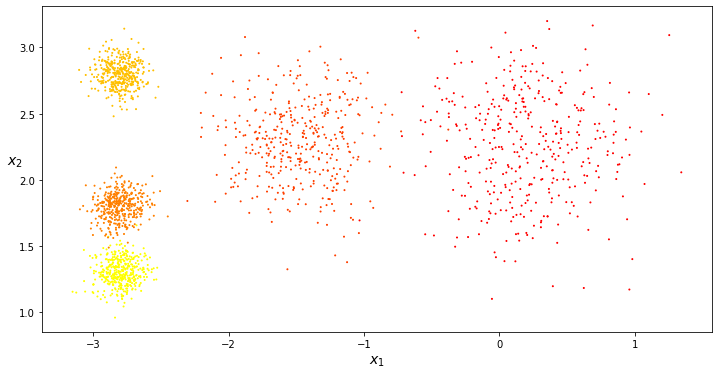

In [8]:
plt.figure(figsize=(12, 6))
plot_clusters(X, y)
plt.show()

## K-Means

First, specify the number of clusters k that the algorithm must find. In this example, it is pretty obvious from looking at the data that k should be set to 5, but in general it is not that easy.


Then, train a K-Means model on this dataset. 

It will try to find each blob’s center and assign each instance to the closest blob.


We will use the sklearn.cluster.KMeans object.


## K-Means Parameters

We need to set the following parameters to train a Kmeans model.

- n_clusters : int, optional, default: 8

        The number of clusters to form as well as the number of centroids to generate.

- init : {‘k-means++’, ‘random’ or an ndarray}

        Method for initialization, defaults to ‘k-means++’:

        - ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

        - ‘random’: choose k observations (rows) at random from data for the initial centroids.

        - If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

- n_init : int, default: 10

        Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

- max_iter : int, default: 300

        Maximum number of iterations of the k-means algorithm for a single run.

- tol : float, default: 1e-4

        Relative tolerance with regards to inertia to declare convergence

- precompute_distances : {‘auto’, True, False}

        Precompute distances (faster but takes more memory).

        - ‘auto’ : do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision.

        - True : always precompute distances

        - False : never precompute distances

- verbose : int, default 0

        Verbosity mode.

- random_state : int, RandomState instance or None (default)

        Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary.

- copy_x : boolean, optional

        When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified, ensuring X is C-contiguous. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean, in this case it will also not ensure that data is C-contiguous which may cause a significant slowdown.

- n_jobs : int or None, optional (default=None)

        The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.

        - None means 1 unless in a joblib.parallel_backend context. 
        -1 means using all processors. 

- algorithm : “auto”, “full” or “elkan”, default=”auto”

        K-means algorithm to use. 
        - "full": The classical EM-style algorithm. 
        - "elkan": It's a variation of K-Means and is more efficient by using the triangle inequality, but currently doesn’t support sparse data. 
        - "auto:: chooses “elkan” for dense data and “full” for sparse data.




Following a list of return attributes:


- cluster_centers_ : array, [n_clusters, n_features]

        Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

- labels_ :

        Labels of each point

- inertia_ : float

        Sum of squared distances of samples to their closest cluster center.

- n_iter_ : int

        Number of iterations run.

## K-Means: Training the Model

In [14]:
# Number of clusters
k = 5


# Train the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)


# Predict the closest cluster each sample in X belongs to.
y_pred = kmeans.fit_predict(X)


print("Closest cluster each sample in X belongs to:\n", y_pred)


# The KMeans instance preserves the labels of the instances it was trained on. 
# Somewhat confusingly, in this context, the label of an instance is the index of the cluster 
#                      that instance gets assigned to:
print("\nThe labels of the instances:\n", kmeans.labels_)

print('Number of Classes=',kmeans.n_clusters )

# Centroids
print("\nCluster Centroids:\n", kmeans.cluster_centers_)

# Prediction for new instances
X_new = np.array([[0, 2], [3, 2], [-3, 1], [-3, 2.5]])
kmeans.predict(X_new)

Closest cluster each sample in X belongs to:
 [4 0 1 ... 2 1 0]

The labels of the instances:
 [4 0 1 ... 2 1 0]
Number of Classes= 5

Cluster Centroids:
 [[-2.80389616  1.80117999]
 [ 0.20876306  2.25551336]
 [-2.79290307  2.79641063]
 [-1.46679593  2.28585348]
 [-2.80037642  1.30082566]]


array([1, 1, 4, 2])

# Plotting Decision Boundary 


To better understand how KMeans performs, we need to **<font color=red size=6> visualize the decision boundary </font>**.


Following functions are used to plot the decision boundary. 

In [17]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=3, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

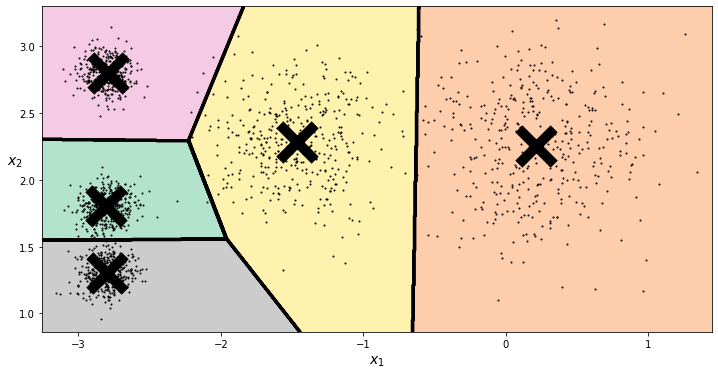

In [18]:
plt.figure(figsize=(12, 6))
plot_decision_boundaries(kmeans, X)
plt.show()

## Measuring the Distance to All Centroids

We can measure the **Euclidean distance** of each instance to all 5 centroids by using the transform() method.

Rather than arbitrarily choosing the closest cluster for each instance, which is called hard clustering, it might be better to measure the distance of each instance to all 5 centroids. 

In [9]:
print("Distance From All Centroids: transform() Method")
print(kmeans.transform(X_new))

# This is indeed the Euclidian distance between each instance and each centroid
print("\nDistance From All Centroids: by Computing the Euclidean Distance")
print(np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2))

Distance From All Centroids: transform() Method
[[0.32995317 2.81093633 1.49439034 2.9042344  2.88633901]
 [2.80290755 5.80730058 4.4759332  5.84739223 5.84236351]
 [3.44564568 0.82483095 2.00103321 1.80830868 0.36103414]
 [3.21806371 0.72581411 1.54808703 0.36159148 1.21567622]]

Distance From All Centroids: by Computing the Euclidean Distance
[[0.32995317 2.81093633 1.49439034 2.9042344  2.88633901]
 [2.80290755 5.80730058 4.4759332  5.84739223 5.84236351]
 [3.44564568 0.82483095 2.00103321 1.80830868 0.36103414]
 [3.21806371 0.72581411 1.54808703 0.36159148 1.21567622]]


## Limitation: Variability of the Clusters


If we run K-Means multiple times (or with different random seeds), it can converge to very different solutions.

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids.

In [23]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

C:\Users\mxj210016\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\mxj210016\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


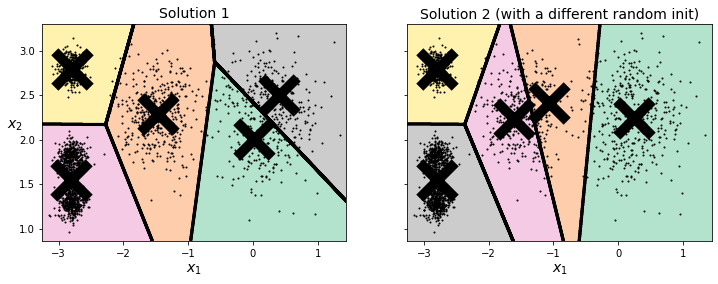

In [26]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

## Model Selection


To select the best model, we need a way to evaluate a K-Means model's performance. 

Unfortunately, clustering is an unsupervised task, so we do not have the targets. 

We use the distance between each instance and its centroid to evaluate the quality of the clusters. 

This distance is computed by the **inertia** metric.

        Inertia is the sum of the squared distances between each training instance and its closest centroid.
        
Note that the score() method returns the **negative inertia**.

In [12]:
print("Inertia: ", kmeans.inertia_)

#  inertia is the sum of the squared distances between each training instance and its closest centroid:

X_dist = kmeans.transform(X)
print("\nInertia (Manually Computed): ", np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2))


print("\nScore (Negative Inertia)): ", kmeans.score(X))

Inertia:  211.5985372581684

Inertia (Manually Computed):  211.59853725816856

Score (Negative Inertia)):  -211.59853725816856


## Select the Best Model

We select the best model by multiple initializations.

We run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. 

This can be done autometically by setting the n_init hyperparameter.

Scikit-Learn runs the original algorithm n_init times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets n_init=10.

C:\Users\mxj210016\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


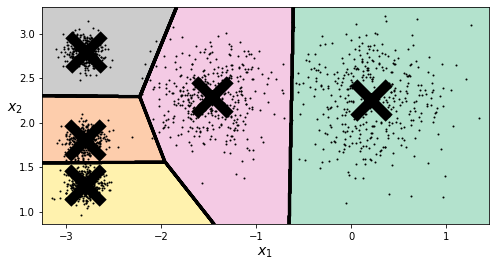

In [29]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()